In [18]:
import tensorflow as tf
import csv
import numpy as np

In [159]:
twss_conv_pretext = []
with open("twss_conv.txt", "r") as file:
    twss_conv_pretext.append(file.readlines())

file.close()

In [163]:
twss_conv_raw = []
for conv in twss_conv_pretext[0]:
    twss_conv_raw.append(conv.strip('\n'))

In [169]:
twss_conv = np.array(twss_conv_raw)

In [170]:
twss_conv[:5]

array(["Put it back in, it's still moist in the middle.",
       "Now if I can just get it in the hole, I'll show it to you up close and personal.",
       '...a great penetration!',
       "That just kind of squirted out there, didn't it!",
       'Oh it feels so good, you just insert here and squeeze.'],
      dtype='<U261')

In [95]:
casual_conv_raw = []
with open("casual_conv.csv", "r") as file:
    csv_reader = csv.DictReader(file)
    
    for row in csv_reader:
        casual_conv_raw.append(row['1'])

In [96]:
casual_conv_raw[:10]

["I have a pixel. It's pretty great. Much better than what I had before. ",
 'Does it really charge all the way in 15 min?',
 "Pretty fast. I've never timed it, but it's under half an hour. ",
 "Samsung Galaxy J1. It's my first cell phone and I've had it for 7 months.",
 "What do you think of it? Anything you don't like?",
 "I love it. I can't think of anything I don't like about it.",
 "LG Optimus V. I know, it's old.",
 "If it does it's job, it's good enough!",
 "Don't kill yourself OP.",
 "I won't give them the satisfaction ;)"]

In [98]:
casual_conv_raw[:10]

["I have a pixel. It's pretty great. Much better than what I had before. ",
 'Does it really charge all the way in 15 min?',
 "Pretty fast. I've never timed it, but it's under half an hour. ",
 "Samsung Galaxy J1. It's my first cell phone and I've had it for 7 months.",
 "What do you think of it? Anything you don't like?",
 "I love it. I can't think of anything I don't like about it.",
 "LG Optimus V. I know, it's old.",
 "If it does it's job, it's good enough!",
 "Don't kill yourself OP.",
 "I won't give them the satisfaction ;)"]

In [99]:
twss_conv.shape

(2027,)

In [108]:
len(casual_conv_raw)

56297

In [102]:
casual_conv = np.array(casual_conv[:2027])

In [109]:
casual_conv.shape

(2027,)

In [173]:
text_corpus_data = []

In [174]:
for conv in casual_conv:
    text_corpus_data.append([conv, 0])

for conv in twss_conv:
    text_corpus_data.append([conv, 1])

In [175]:
text_corpus_data[:2]

[['What kind of phone(s) do you guys have?', 0],
 ["I have a pixel. It's pretty great. Much better than what I had before. ",
  0]]

In [176]:
import random

In [177]:
random.seed(1)

In [178]:
random.shuffle(text_corpus_data)

In [179]:
text_corpus_data[:10]

[['I liked the big balls better.', 1],
 ['My cat meows at me but protests when I cuddle her. Agony Uncle, impart on me some wisdom. ',
  0],
 ['YOU FORGOT THE PERIOD AT THE END OF YOUR SENTENCE.  PREPARE YOUR ANUS.', 0],
 ['how long does it take to get hard?', 1],
 ["It's so big! I can't possibly fit the whole thing in my mouth!", 1],
 ['Up to you! :D \n\nMy purpose is to spread positivity around like a virus ;)',
  0],
 ['Nice! I took a chem test yesterday too!\n', 0],
 ["Wow, that's the most impressive thing I've ever seen.", 1],
 ['I think it might have been the group that was just using it.', 1],
 ["If there's anything I'm an expert at, is making things fit into small spaces!",
  1]]

In [181]:
sentences = []
labels = []
for sentence, label in text_corpus_data:
    sentences.append(sentence)
    labels.append(label)

In [189]:
print(type(sentence), type(labels))

<class 'numpy.str_'> <class 'numpy.ndarray'>


In [188]:
labels = np.array(labels)

In [190]:
labels.shape

(4054,)

In [192]:
sentences = np.array(sentences)

In [193]:
sentences.shape

(4054,)

In [194]:
training_sentences = sentences[:3800]
training_labels = labels[:3800]
testing_sentences = sentences[3800:]
testing_labels = labels[3800:]

In [199]:
print(training_sentences[:5],training_labels[:5])

['I liked the big balls better.'
 'My cat meows at me but protests when I cuddle her. Agony Uncle, impart on me some wisdom. '
 'YOU FORGOT THE PERIOD AT THE END OF YOUR SENTENCE.  PREPARE YOUR ANUS.'
 'how long does it take to get hard?'
 "It's so big! I can't possibly fit the whole thing in my mouth!"] [1 0 0 1 1]


In [223]:
vocab_size = 5000
oov = "<OUT_OF_VOCAB>"
embedding_dims = 30
max_len = 100
pad_type = "post"
trunc_type = "post"

In [224]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=vocab_size, oov_token=oov)

In [225]:
tokenizer.fit_on_texts(training_sentences)

In [226]:
word_index = tokenizer.word_index

In [227]:
len(word_index)

2952

In [243]:
training_sequence = tokenizer.texts_to_sequences(training_sentences)

In [244]:
training_sequence[:5]

[[3, 1068, 7, 43, 196, 133],
 [10,
  511,
  1384,
  57,
  18,
  19,
  1385,
  58,
  3,
  1386,
  141,
  566,
  567,
  1387,
  27,
  18,
  83,
  1388],
 [4, 439, 7, 759, 57, 7, 349, 15, 17, 622, 623, 17, 512],
 [44, 70, 138, 2, 116, 5, 24, 37],
 [11, 16, 43, 3, 48, 882, 76, 7, 188, 66, 6, 10, 42]]

In [245]:
train_pad_sequence = tf.keras.preprocessing.sequence.pad_sequences(training_sequence, maxlen=max_len, padding=pad_type, truncating=trunc_type)

In [246]:
print(train_pad_sequence[:2])

[[   3 1068    7   43  196  133    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]
 [  10  511 1384   57   18   19 1385   58    3 1386  141  566  567 1387
    27   18   83 1388    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0

In [247]:
test_sequence = tokenizer.texts_to_sequences(testing_sentences)

In [248]:
test_sequence[1]

[28, 12]

In [250]:
test_pad_sequence = tf.keras.preprocessing.sequence.pad_sequences(test_sequence, maxlen=max_len, padding=pad_type, truncating=trunc_type)

In [252]:
test_pad_sequence[:2]

array([[  65,   63,   20,  309, 2671, 2672, 2673, 2674,    9, 2675,  180,
          33,   27,    7, 2676,   46,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0],
       [  28,   12,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    

In [253]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dims, input_length=max_len),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

In [254]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 30)           150000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 30)                0         
_________________________________________________________________
dense (Dense)                (None, 512)               15872     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 513       
Total params: 166,385
Trainable params: 166,385
Non-trainable params: 0
_________________________________________________________________


In [255]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.binary_crossentropy, metrics=['accuracy'])

In [256]:
history = model.fit(train_pad_sequence, training_labels, epochs=10, validation_data=(test_pad_sequence, testing_labels))

Epoch 1/10
119/119 [==============================] - 1s 7ms/step - loss: 0.6893 - accuracy: 0.5337 - val_loss: 0.6807 - val_accuracy: 0.4961
Epoch 2/10
119/119 [==============================] - 1s 5ms/step - loss: 0.5229 - accuracy: 0.8147 - val_loss: 0.4182 - val_accuracy: 0.8150
Epoch 3/10
119/119 [==============================] - 1s 5ms/step - loss: 0.2819 - accuracy: 0.8916 - val_loss: 0.3010 - val_accuracy: 0.8780
Epoch 4/10
119/119 [==============================] - 1s 6ms/step - loss: 0.1909 - accuracy: 0.9292 - val_loss: 0.2394 - val_accuracy: 0.9213
Epoch 5/10
119/119 [==============================] - 1s 5ms/step - loss: 0.1400 - accuracy: 0.9526 - val_loss: 0.1988 - val_accuracy: 0.9252
Epoch 6/10
119/119 [==============================] - 1s 6ms/step - loss: 0.1095 - accuracy: 0.9668 - val_loss: 0.1782 - val_accuracy: 0.9213
Epoch 7/10
119/119 [==============================] - 1s 6ms/step - loss: 0.0841 - accuracy: 0.9732 - val_loss: 0.1440 - val_accuracy: 0.9331
Epoch 

In [257]:
model.save('model-1.h5')

In [258]:
import pickle

with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [262]:
with open("sentences.pickle", "wb") as handle:
    pickle.dump(sentences, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open("labels.pickle", "wb") as handle:
    pickle.dump(labels, handle, protocol=pickle.HIGHEST_PROTOCOL)


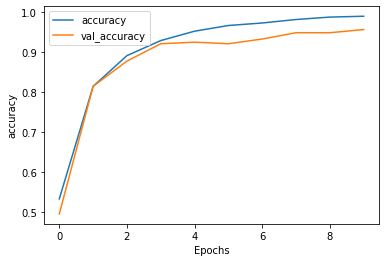

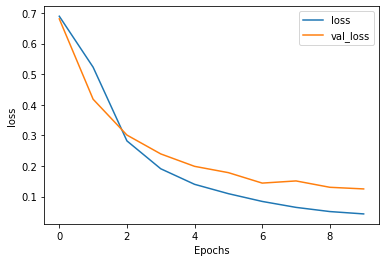

In [263]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [284]:
test_sentence = ["Come in a straight line", "Hello, how are you?", "It is a rainy day."]
test_seq = tokenizer.texts_to_sequences(test_sentence)
test_pad = tf.keras.preprocessing.sequence.pad_sequences(test_seq, maxlen=max_len, padding=pad_type, truncating=trunc_type)

In [285]:
test_pad

array([[ 73,   6,   8, 359,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0],
       [600,  44,  34,   4,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [286]:
pred_class = model.predict_classes(test_pad)
pred_score = model.predict(test_pad)

In [287]:
print(pred_class)
print(pred_score)

[[1]
 [0]
 [0]]
[[0.9890983 ]
 [0.0104784 ]
 [0.09592924]]
